In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
churn_df = pd.read_csv("CustomerInformation.csv")
churn_df.head()

,Customer_ID,Customer_PurchaseChannelGroup,Customer_MembershipType,Customer_LoyaltyStatus,FirstTransactionDate,LastTransactionDate,Tenure,AOV,OrderFrequency,Customer_OrderCount,...,Gender,Income_Updated,Footwear,Apparel,Hats,Gifts_Home,Accessories,Tack,Misc_Startup,churn
0,9364512,Omni,GOLD,Loyalty,1/11/2016 0:00,6/24/2022 0:00,77,62.359153,18,130,...,M,J,27,198,19,4,12,0,0,0
1,5081486,StoreOnly,GOLD,Loyalty,1/18/2015 0:00,7/23/2021 0:00,78,103.174666,158,15,...,F,,6,10,1,0,4,0,0,1
2,397745,StoreOnly,GOLD,Loyalty,3/11/2012 0:00,5/15/2021 0:00,110,77.148541,69,48,...,,,6,98,12,4,22,0,6,1
3,9345824,StoreOnly,GOLD,Loyalty,3/3/2016 0:00,1/21/2022 0:00,70,128.346190,102,21,...,,,14,32,0,0,11,0,1,1
4,5357812,StoreOnly,GOLD,Loyalty,3/4/2016 0:00,3/25/2022 0:00,72,70.461904,105,21,...,M,M,1,31,3,0,10,0,0,0


In [29]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    50000 non-null  int64  
 1   Customer_PurchaseChannelGroup  49985 non-null  object 
 2   Customer_MembershipType        50000 non-null  object 
 3   Customer_LoyaltyStatus         50000 non-null  object 
 4   FirstTransactionDate           50000 non-null  object 
 5   LastTransactionDate            50000 non-null  object 
 6   Tenure                         50000 non-null  int64  
 7   AOV                            50000 non-null  float64
 8   OrderFrequency                 50000 non-null  int64  
 9   Customer_OrderCount            50000 non-null  int64  
 10  State                          49893 non-null  object 
 11  Gender                         50000 non-null  object 
 12  Income_Updated                 50000 non-null 

In [30]:
## tenure: number of months the customer has stayed with the company
## AOV: average order value

categorical_features = [
"Customer_PurchaseChannelGroup",
"Customer_MembershipType",
"Customer_LoyaltyStatus",
"State",
"Gender",
"Income_Updated",
]
numerical_features = ["Tenure", "AOV", "OrderFrequency", "Customer_OrderCount", "Footwear", "Apparel", "Hats", "Gifts_Home", "Accessories", "Tack", "Misc_Startup" ]
target = "churn"

In [31]:
churn_df[numerical_features].describe()

,Tenure,AOV,OrderFrequency,Customer_OrderCount,Footwear,Apparel,Hats,Gifts_Home,Accessories,Tack,Misc_Startup
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,64.650320,126.612777,242.916560,21.725680,10.928340,23.424080,2.864780,2.429000,10.538660,0.072440,0.375420
std,41.220072,72.167593,229.249629,125.813906,95.850002,190.632909,12.028193,9.477719,71.138012,1.134151,4.105301
min,0.000000,-465.940000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,84.994583,83.000000,4.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,70.000000,114.351941,163.000000,10.000000,5.000000,7.000000,1.000000,0.000000,4.000000,0.000000,0.000000
75%,100.000000,153.663437,316.000000,22.000000,10.000000,24.000000,3.000000,2.000000,11.000000,0.000000,0.000000
max,134.000000,4195.545000,1826.000000,19667.000000,12081.000000,28941.000000,1482.000000,756.000000,12933.000000,77.000000,645.000000


In [37]:
# churn_df.quantile(q=0.95,axis=0,numeric_only=True,interpolation='linear')
print(churn_df['AOV'].quantile(q=0.95))

243.95799999999997


In [35]:
churn_df = churn_df.drop(churn_df[churn_df['AOV'] <= 0].index)

<AxesSubplot:xlabel='churn', ylabel='Apparel'>

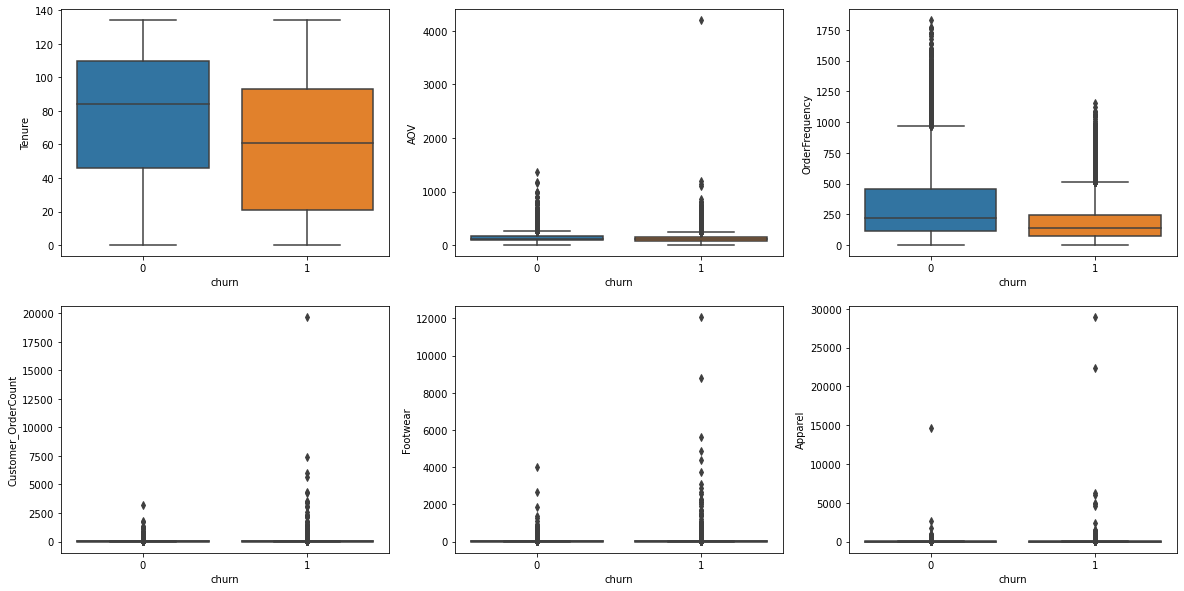

In [38]:
_,axss = plt.subplots(2,3,figsize = [20,10])
sns.boxplot(x='churn', y='Tenure',data=churn_df,ax=axss[0][0])
sns.boxplot(x='churn', y='AOV',data=churn_df,ax=axss[0][1])
sns.boxplot(x='churn', y='OrderFrequency',data=churn_df,ax=axss[0][2])
sns.boxplot(x='churn', y='Customer_OrderCount',data=churn_df,ax=axss[1][0])
sns.boxplot(x='churn', y='Footwear',data=churn_df,ax=axss[1][1])
sns.boxplot(x='churn', y='Apparel',data=churn_df,ax=axss[1][2])

<AxesSubplot:xlabel='churn', ylabel='count'>

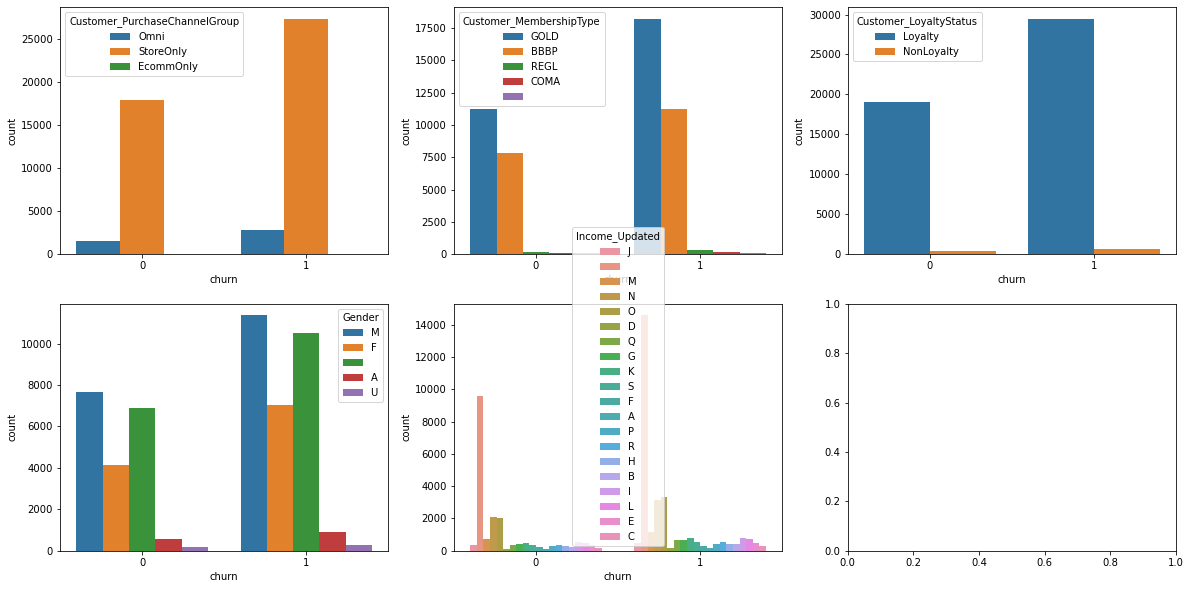

In [16]:
_,axss = plt.subplots(2,3,figsize = [20,10])
sns.countplot(x='churn', hue='Customer_PurchaseChannelGroup', data=churn_df,ax = axss[0][0])
sns.countplot(x='churn', hue='Customer_MembershipType', data=churn_df,ax = axss[0][1])
sns.countplot(x='churn', hue='Customer_LoyaltyStatus', data=churn_df,ax = axss[0][2])
sns.countplot(x='churn', hue='Gender', data=churn_df,ax = axss[1][0])
sns.countplot(x='churn', hue='Income_Updated', data=churn_df,ax = axss[1][1])


<AxesSubplot:>

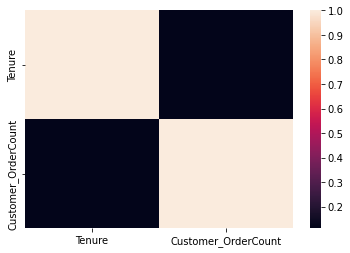

In [18]:
corr_score = churn_df[['Tenure','Customer_OrderCount']].corr()

sns.heatmap(corr_score)